<a href="https://colab.research.google.com/github/spurdue11/plots_for_chem_lit/blob/main/Blackbody_Radiation_Wien_and_Inverse_Square.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and import libraries

In [1]:
!pip install whit-phys-util

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import whit_phys_util as buc
from scipy.interpolate import interp1d

# Connect to GitHub

In [3]:
repo = buc.local_repository("https://github.com/WhitworthPhysics/blackbody-radiation-wiens-law-and-inverse-square-law-spurdue11")

Repository exists at this location. Pulling changes from GitHub.


# Introduction

## Objective

To varify peak blackbody spectrum wavelength dependence on temperature and the inverse square law for light intensity.

## Equipment and materials
| Description | Manufacturer | Model | ID or SN |
| ----------- | ------------ | ----- | -------- |
| Photodiode detector | Thor Labs | PDA36A | N/A |
| Stefan-Boltzmann lamp | PASCO | TD-8555 | N/A |
| Digital multimeters | Fluke | 117 True RMS | 49640101SV |
| Digital multimeters | Fluke | 117 True RMS | 49640102SV |
| Power supply (max. 13 V DC, min. 2 A) | CENCO | 79550 | P-176 |
| Spectrometer with optical fiber cable | Ocean optics | USB4000 | 211-00000-chm |
| Optic fiber cable | Ocean Optics | P4000-2-UV-VIS | 00S-000925-37 |
| Aluminum meter stick | Starrett | N/A | N/A |

## Equations

$\lambda_{peak} = \frac{b}{T}$

$I = \frac{a}{(x - x_0)^n}$

# Temperature-dependence of the blackbody spectrum

## Data

In [4]:
b = 2.898*10**(-3)   # m.K
T_room = 20.6 + 273.15   # K
R_room = 0.3   # ohms
a = 4.5*10**(-3)   # 1/K
R_ref = R_room + a*R_room*(300-T_room)   # ohms

In [5]:
df_lamp_calib = pd.read_csv('lamp_calibration.csv')
df_temp = pd.read_table('Data_temp_dep.tsv')
df_temp['R (ohms)'] = df_temp['Voltage (V)']/df_temp['Current (A)']
df_temp['R ratio'] = df_temp['R (ohms)']/R_ref
convert_Rratio_to_T = interp1d(df_lamp_calib['R Ratio'], df_lamp_calib['Temperature (K)'], kind='cubic')
df_temp['Temperature (K)'] = convert_Rratio_to_T(df_temp['R ratio'])
df_temp['Inverse temperature (1/K)'] = 1/df_temp['Temperature (K)']
df_temp['Wavelength_peak (m)'] = df_temp['Wavelength_peak (nm)']/10**9
df_temp.head()

,Voltage (V),Current (A),Wavelength_peak (nm),R (ohms),R ratio,Temperature (K),Inverse temperature (1/K),Wavelength_peak (m)
0,6.02,2.173,656.72,2.770364,8.981928,1821.036336,0.000549,6.567200e-07
1,8.12,2.532,631.85,3.206951,10.397410,2061.509734,0.000485,6.318500e-07
2,10.02,2.837,615.41,3.531900,11.450942,2235.196901,0.000447,6.154100e-07
3,12.06,3.139,610.78,3.841988,12.456293,2399.401913,0.000417,6.107800e-07


## Analysis

In [6]:
fitTable, fitFunc = buc.prettyPolyFit(df_temp['Inverse temperature (1/K)'], df_temp['Wavelength_peak (m)'])
fitTable

,slope,intercept
value,0.000361,4.573814e-07
uncertainty,0.000068,3.233921e-08


In [12]:
print("The slope of peak wavelength versus 1/T is (%.5f ± %.5f)" % tuple(fitTable['slope']))
print("The intercept of peak wavelength versus 1/T is (%.0E ± %.1E)" % tuple(fitTable['intercept']))

The slope of peak wavelength versus 1/T is (0.00036 ± 0.00007)
The intercept of peak wavelength versus 1/T is (5E-07 ± 3.2E-08)


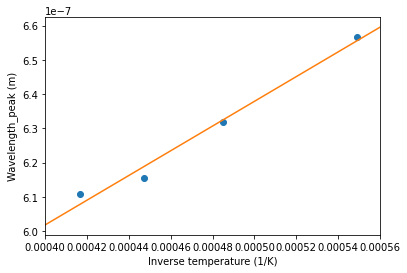

In [18]:
fig, ax = plt.subplots()
ax.plot(df_temp['Inverse temperature (1/K)'], df_temp['Wavelength_peak (m)'], "o");
ax.set_xlabel("Inverse temperature (1/K)");
ax.set_ylabel("Wavelength_peak (m)");
t_fit = np.linspace(0.0004,0.00056,2);
ax.plot(t_fit, fitFunc(t_fit));
ax.set_xlim(0.0004,0.00056);

# Distance-dependence of intensity

## Data

Constant current throughout this experiment $\approx$ 2.929 A

In [9]:
df_int = pd.read_table('Data_intensity_dep.tsv')
df_int['Distance (inch)'] = 33 - df_int['Position (inch)']
df_int['Distance (m)'] = df_int['Distance (inch)']*2.54/100
df_int.head()

,Position (inch),Intensity (au),Distance (inch),Distance (m)
0,33,0.206,0,0.0000
1,32,0.172,1,0.0254
2,31,0.134,2,0.0508
3,30,0.104,3,0.0762
4,29,0.081,4,0.1016


## Analysis